In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import wilcoxon, mannwhitneyu

In [2]:
cutoff = 2
#order = ['Memory B cell',  'CD8 effector','NK','Naive B cell','Naive CD8','CD8 central memory','Plasma','Mono', 'CD8 effector memory', 'Tregs','Naive CD4',
        #'CD4 effector memory','CD4 central memory']
file = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/OurCD8TIL_ranked/melanoma_EMseq_thirdbatch/combined_result/deconresult_gt/fresh/method1Fract_BL22CD8TILranked100_merged_mel_inflectionSM.txt_result_posscore.txt_CSxOut.txt_yale3rdbatch_gt.txt_ctrename.txt'
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

values = ['NDB','DCB']


order=['MelTumor','Tregs', 'Memory B', 'CD8 TEM', 'CD8 TCM', 'CD4 TCM', 'Naive B', 'CD4 TEM', 'Naive CD4 T', 'Megakaryocyte', 'Naive CD8',  'Erythrocyte', 'Mac (M1)', 'Mac (M2)', 'mDC', 'iDC', 'Mac (M0)', 'CD8 TEMRA', 'PMN', 'NK', 'Eosinophil','Mono','CD8TIL']

#order=['CD8','CD4','NK','Bcell','Mono']
'''
order=df.columns.tolist()
order.remove('Toxicity')
order.remove('Total')
order.remove('Response')
order.remove('Batch')
order.remove('Sequencing Technology')
'''

"\norder=df.columns.tolist()\norder.remove('Toxicity')\norder.remove('Total')\norder.remove('Response')\norder.remove('Batch')\norder.remove('Sequencing Technology')\n"

In [3]:
df = (df[df['Response'].notna()]).copy()

In [4]:

df['Toxic'] = df['Response']
df

,Naive CD4 T,Naive CD8,Naive B,NK,Mono,Mac (M0),Mac (M1),Mac (M2),iDC,mDC,...,CD8 TEMRA,Megakaryocyte,CD4 TCM,Erythrocyte,Memory B,CD8TIL,MelTumor,Response,Toxicity,Toxic
Mixture,,,,,,,,,,,,,,,,,,,,,
YUAMPLE-21-4224-auto,2.957005,3.148656,3.363971,3.655603,5.000270,4.725995,4.230054,3.919994,4.195223,3.202588,...,3.505696,10.149149,3.042452,7.805506,2.874159,4.517497,3.147843,DCB,NaN,DCB
YUBOISE-21-4256-auto,3.224660,3.080580,3.554643,3.805037,4.469429,4.244695,3.974417,3.586914,4.165170,3.770229,...,3.591341,9.612456,3.338390,7.764361,3.036054,4.078390,3.169746,NDB,NaN,NDB
YUDUCO-21-4244-auto,3.162717,3.079440,3.467758,3.598969,4.014356,4.641816,4.386528,4.010877,3.894264,3.540948,...,3.271198,8.784596,3.615897,7.739207,2.804845,3.987853,4.592811,DCB,NaN,DCB
YUHARP-21-4291-auto,3.506179,3.124261,3.408576,3.413610,4.081180,4.676789,4.415562,4.128417,3.940323,3.583754,...,3.464532,6.995931,3.781029,5.541311,3.006487,4.089343,6.159722,DCB,NaN,DCB
YUHELIX-12-2576-auto,2.783625,2.718474,3.404297,3.043388,4.372716,4.538480,3.303133,3.085959,4.403308,3.676224,...,3.047556,4.216523,2.915369,3.470845,2.892097,4.914017,2.713276,DCB,3.0,DCB
YUKUW-21-4198-auto,3.610217,3.451182,3.685410,3.465805,4.012396,4.575266,4.047741,3.861960,3.806421,3.302025,...,3.563275,8.334575,3.604901,6.668782,3.016974,4.147419,3.433701,DCB,NaN,DCB
YUKYOTO-21-4372-auto,3.241534,3.322926,3.655018,3.810373,4.944269,4.545339,4.226526,3.832916,4.241500,3.414424,...,3.659366,8.454410,3.247610,7.108756,3.392315,4.037267,3.098210,NDB,NaN,NDB
YUMAZO-21-4275-auto,2.795334,2.937780,3.236920,3.385667,5.128171,5.060717,4.212094,3.538955,4.391642,3.509341,...,3.151419,9.916407,3.308016,7.851664,2.680446,4.089306,2.823241,DCB,NaN,DCB
YUMUZEL-21-4351-auto,3.295674,3.484078,4.123659,3.742049,5.474239,4.687677,4.078188,3.794405,4.113120,3.371079,...,3.587346,5.734212,3.405080,5.190037,3.582328,4.136352,3.082011,DCB,NaN,DCB


In [5]:
p_vals = {}
for cell in order:
    p_val_list = []
    if cell not in ['Toxicity', 'Toxic']:
        multi = 1
        for i, toxicity in enumerate(values):
            y = np.array(df[df['Toxic'] == toxicity][cell])
            p_val_list.append(y)
        if np.mean(p_val_list[0]) >= np.mean(p_val_list[1]):
            multi = -1
        p_vals[cell] = -np.log10(mannwhitneyu(p_val_list[0], p_val_list[1], alternative='two-sided')[1]) * multi
        
p_vals

{'MelTumor': -0.10202861856237917,
 'Tregs': 0.37084892190959545,
 'Memory B': -0.5044170346212903,
 'CD8 TEM': -0.01879196705527539,
 'CD8 TCM': 0.01879196705527539,
 'CD4 TCM': -0.01879196705527539,
 'Naive B': 0.01879196705527539,
 'CD4 TEM': 0.10202861856237917,
 'Naive CD4 T': -0.2524660052140751,
 'Megakaryocyte': 0.01879196705527539,
 'Naive CD8': -0.37084892190959545,
 'Erythrocyte': -0.01879196705527539,
 'Mac (M1)': -0.2524660052140751,
 'Mac (M2)': -0.10202861856237917,
 'mDC': -0.4357005412928069,
 'iDC': 0.30979483308853195,
 'Mac (M0)': -0.10202861856237917,
 'CD8 TEMRA': -0.19878495837761379,
 'PMN': 0.10202861856237917,
 'NK': -0.7343613413824318,
 'Eosinophil': 0.1486687294316775,
 'Mono': -0.1486687294316775,
 'CD8TIL': 0.37084892190959545}

In [6]:
'''
type(p_vals)
p_vals={k: v for k, v in sorted(p_vals.items(), key=lambda item: item[1])}
print(p_vals)
order=p_vals.keys()
print(order)
'''

'\ntype(p_vals)\np_vals={k: v for k, v in sorted(p_vals.items(), key=lambda item: item[1])}\nprint(p_vals)\norder=p_vals.keys()\nprint(order)\n'

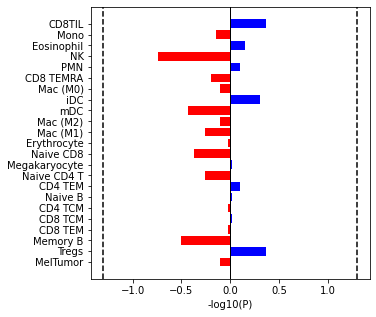

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for cell in order:
    y = p_vals[cell]
    if y <= 0:
        ax.barh(cell, y, color='r')
    else:
        ax.barh(cell, y, color='b')
        
ax.axvline(linewidth=1, color='k')
ax.axvline(x=-np.log10(0.05), linewidth=1.5, color='k', ls='--')
ax.axvline(x=np.log10(0.05), linewidth=1.5, color='k', ls='--')

#ax.annotate('P < 0.05', (0.85, 10), fontsize=12)
#ax.annotate('P < 0.05', (-1, 10), fontsize=12)
ax.set_xlabel('-log10(P)')
plt.savefig(file+'_response_barplot_mean.pdf', bbox_inches='tight')